Awesome—let’s build a markdown-ready framework to simulate SPY’s trajectory through an **AI-driven bubble** scenario by 2029. We’ll layer in:

- 📍 Baseline (SPY on 11/30/2022)
- 📈 Projected EPS growth to 2029
- 🔁 Valuation expansion (P/E multiple)
- 💥 Bubble vs. correction scenarios

---

## 🧮 SPY Valuation Simulator: AI Bubble Scenario

```markdown
# SPY Valuation Simulator: AI Bubble 2029

## 📍 Baseline (as of 11/30/2022)
- SPY Price: $407
- S&P 500 EPS (Trailing): $220
- Implied P/E: ~18.5×

---

## 📈 Projected EPS Growth to 2029
Assume EPS grows at ~6.4% CAGR:

| Year | EPS Estimate |
|------|--------------|
| 2022 | $220         |
| 2023 | $234         |
| 2024 | $249         |
| 2025 | $265         |
| 2026 | $282         |
| 2027 | $300         |
| 2028 | $310         |
| 2029 | **$320**     |

---

## 🔁 Valuation Expansion Scenarios

| P/E Multiple | Implied SPX | Implied SPY |
|--------------|-------------|-------------|
| 20×          | 6,400       | ~$720       |
| 25×          | 8,000       | ~$900       |
| 30× (Bubble) | 9,600       | ~$1,075     |
| 15× (Post-Burst) | 4,800   | ~$540       |

> SPY ≈ SPX ÷ 8.9 (adjusted for ETF structure)

---

## 💥 Bubble vs. Correction

- **Bubble Peak (2029):**  
  - EPS = $320  
  - P/E = 30×  
  - SPY ≈ $1,075  

- **Post-Burst (2030–2031):**  
  - EPS = $330 (modest growth)  
  - P/E compresses to 15×  
  - SPY ≈ $550  

---

## 🧠 Notes

- This framework assumes no dividend reinvestment.
- You can adjust EPS CAGR and P/E sliders to simulate different macro regimes.
- Historical analogs:  
  - Dot-com peak (2000): P/E ~30×  
  - Post-crash (2002): P/E ~15×  
  - COVID rebound (2021): P/E ~22–23×

---

## 🔧 Next Steps

Would you like to add:
- Python simulation code for probabilistic EPS paths?
- Interactive sliders for P/E and macro overlays?
- Historical chart comparisons (e.g., 2000–2002 vs. 2023–2029)?

```

Let’s iterate this into a reusable notebook or onboarding doc. Want to scaffold the simulation code next?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# If not already installed, run this in a cell:
# !pip install ipywidgets

import ipywidgets as widgets
from ipywidgets import interact, FloatSlider, IntSlider


# Baseline parameters
baseline_year = 2022
baseline_eps = 220
baseline_spy = 407
years_forward = 7
target_year = baseline_year + years_forward


In [2]:
# Assume EPS grows at 6.4% CAGR
eps_cagr = 0.064
years = np.arange(baseline_year, target_year + 1)
eps_projection = baseline_eps * (1 + eps_cagr) ** (years - baseline_year)

eps_df = pd.DataFrame({'Year': years, 'Projected_EPS': eps_projection})
eps_df.set_index('Year', inplace=True)
eps_df


,Projected_EPS
Year,
2022,220.000000
2023,234.080000
2024,249.061120
2025,265.001032
2026,281.961098
2027,300.006608
2028,319.207031
2029,339.636281


In [3]:
# Define P/E multiples to simulate
pe_multiples = [15, 20, 25, 30]
spy_multiplier = 1 / 8.9  # SPY ≈ SPX / 8.9

valuation_df = pd.DataFrame({
    f'P/E {pe}x': eps_df['Projected_EPS'][target_year] * pe for pe in pe_multiples
}, index=['SPX'])

valuation_df.loc['SPY'] = valuation_df.loc['SPX'] * spy_multiplier
valuation_df


,P/E 15x,P/E 20x,P/E 25x,P/E 30x
SPX,5094.544213,6792.725617,8490.907021,10189.088425
SPY,572.420698,763.227597,954.034497,1144.841396


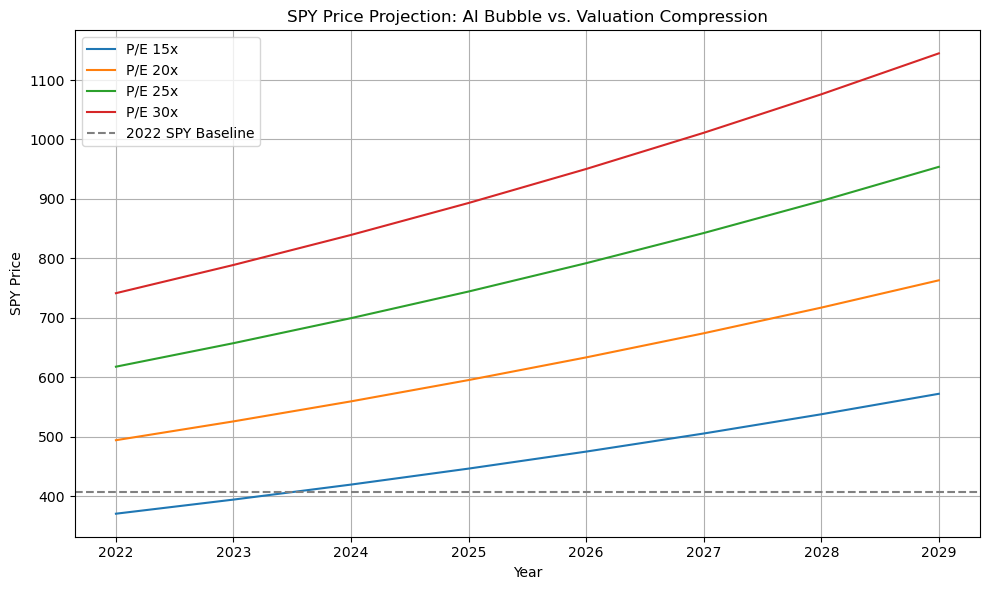

In [4]:
plt.figure(figsize=(10, 6))
for pe in pe_multiples:
    spx_vals = eps_projection * pe
    spy_vals = spx_vals * spy_multiplier
    plt.plot(years, spy_vals, label=f'P/E {pe}x')

plt.axhline(y=baseline_spy, color='gray', linestyle='--', label='2022 SPY Baseline')
plt.title('SPY Price Projection: AI Bubble vs. Valuation Compression')
plt.xlabel('Year')
plt.ylabel('SPY Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [5]:
def spy_projection(eps_cagr=0.064, pe_ratio=25):
    years = np.arange(baseline_year, target_year + 1)
    eps_projection = baseline_eps * (1 + eps_cagr) ** (years - baseline_year)
    spx_projection = eps_projection * pe_ratio
    spy_projection = spx_projection * spy_multiplier

    plt.figure(figsize=(10, 6))
    plt.plot(years, spy_projection, marker='o', label=f'P/E {pe_ratio}×')
    plt.axhline(y=baseline_spy, color='gray', linestyle='--', label='2022 SPY Baseline')
    plt.title('SPY Price Projection with Adjustable EPS CAGR and P/E')
    plt.xlabel('Year')
    plt.ylabel('SPY Price')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    final_price = spy_projection[-1]
    print(f"Projected SPY Price in {target_year} with EPS CAGR {eps_cagr:.2%} and P/E {pe_ratio}×: ${final_price:.2f}")


In [6]:
interact(
    spy_projection,
    eps_cagr=FloatSlider(value=0.064, min=0.03, max=0.10, step=0.005, description='EPS CAGR'),
    pe_ratio=IntSlider(value=25, min=10, max=35, step=1, description='P/E Ratio')
)


interactive(children=(FloatSlider(value=0.064, description='EPS CAGR', max=0.1, min=0.03, step=0.005), IntSlid…

<function __main__.spy_projection(eps_cagr=0.064, pe_ratio=25)>

In [7]:
def simulate_eps_paths(
    baseline_eps=220,
    years=7,
    n_simulations=1000,
    mean_growth=0.064,
    std_dev=0.02
):
    np.random.seed(42)
    eps_paths = np.zeros((n_simulations, years + 1))
    eps_paths[:, 0] = baseline_eps

    for t in range(1, years + 1):
        growth_rates = np.random.normal(mean_growth, std_dev, n_simulations)
        eps_paths[:, t] = eps_paths[:, t - 1] * (1 + growth_rates)

    return eps_paths


In [8]:
def spy_price_distribution(eps_paths, pe_ratio=30):
    final_eps = eps_paths[:, -1]
    final_spx = final_eps * pe_ratio
    final_spy = final_spx * spy_multiplier
    return final_spy


In [9]:
def plot_spy_distribution(spy_prices, pe_ratio):
    plt.figure(figsize=(10, 6))
    plt.hist(spy_prices, bins=50, color='skyblue', edgecolor='black')
    plt.title(f'SPY Price Distribution in {target_year} (P/E {pe_ratio}×)')
    plt.xlabel('SPY Price')
    plt.ylabel('Frequency')
    plt.axvline(x=np.mean(spy_prices), color='red', linestyle='--', label=f'Mean: ${np.mean(spy_prices):.2f}')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


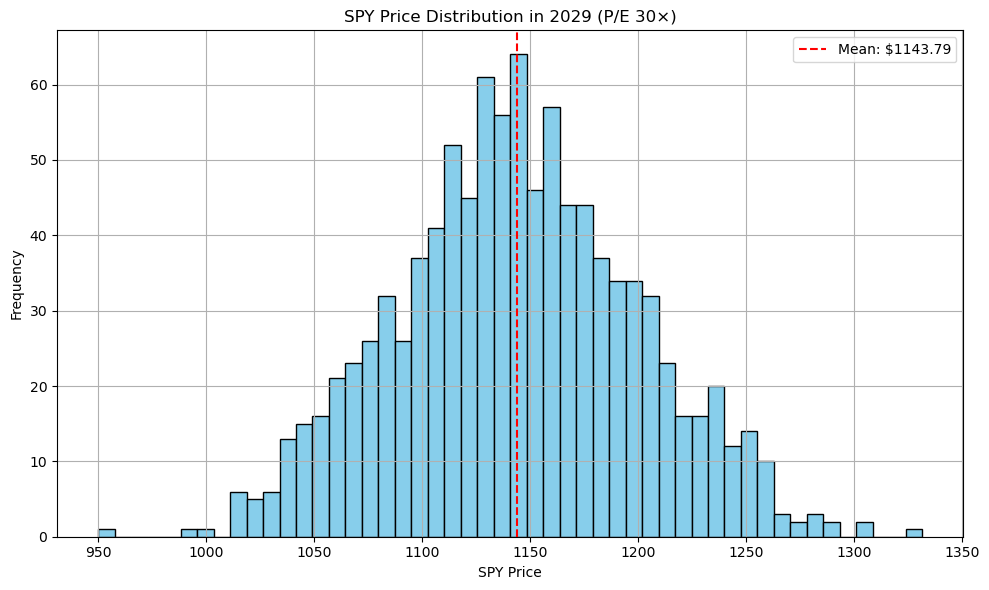

In [10]:
# Simulate EPS paths
eps_paths = simulate_eps_paths()

# Calculate SPY prices under bubble P/E
spy_prices_bubble = spy_price_distribution(eps_paths, pe_ratio=30)

# Plot the distribution
plot_spy_distribution(spy_prices_bubble, pe_ratio=30)


In [11]:
def interactive_simulation(mean_growth=0.064, std_dev=0.02, pe_ratio=30):
    # Simulate EPS paths
    eps_paths = simulate_eps_paths(
        baseline_eps=baseline_eps,
        years=years_forward,
        n_simulations=1000,
        mean_growth=mean_growth,
        std_dev=std_dev
    )

    # Calculate SPY prices
    spy_prices = spy_price_distribution(eps_paths, pe_ratio=pe_ratio)

    # Plot distribution
    plot_spy_distribution(spy_prices, pe_ratio)

    # Summary stats
    print(f"Mean SPY Price: ${np.mean(spy_prices):.2f}")
    print(f"Median SPY Price: ${np.median(spy_prices):.2f}")
    print(f"95% Confidence Interval: ${np.percentile(spy_prices, 2.5):.2f} – ${np.percentile(spy_prices, 97.5):.2f}")


In [12]:
interact(
    interactive_simulation,
    mean_growth=FloatSlider(value=0.064, min=0.03, max=0.10, step=0.005, description='EPS CAGR'),
    std_dev=FloatSlider(value=0.02, min=0.005, max=0.05, step=0.005, description='Volatility'),
    pe_ratio=IntSlider(value=30, min=10, max=35, step=1, description='P/E Ratio')
)


interactive(children=(FloatSlider(value=0.064, description='EPS CAGR', max=0.1, min=0.03, step=0.005), FloatSl…

<function __main__.interactive_simulation(mean_growth=0.064, std_dev=0.02, pe_ratio=30)>